## Bar charts

In [14]:
import pandas as pd
import sqlite3

### Connection to sqlite3

In [15]:
conn = sqlite3.connect("../ex00/data/checking-logs.sqlite")

In [16]:
pd.read_sql("PRAGMA table_info(checker);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [17]:
query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%';
"""
df = pd.read_sql_query(query, conn)
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['working_day'] = df['timestamp'].dt.weekday  # 0=Mon, 6=Sun
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date 
df['day_type'] = df['working_day'].apply(lambda x: 'working_day' if x < 5 else 'weekend')
df

,timestamp,working_day,hour,date,day_type
0,2020-04-17 05:19:02.744528,4,5,2020-04-17,working_day
1,2020-04-17 05:22:35.249331,4,5,2020-04-17,working_day
2,2020-04-17 05:22:45.549397,4,5,2020-04-17,working_day
3,2020-04-17 05:34:14.691200,4,5,2020-04-17,working_day
4,2020-04-17 05:34:24.422370,4,5,2020-04-17,working_day
...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,3,20,2020-05-21,working_day
3203,2020-05-21 20:22:41.785725,3,20,2020-05-21,working_day
3204,2020-05-21 20:22:41.877806,3,20,2020-05-21,working_day
3205,2020-05-21 20:37:00.129678,3,20,2020-05-21,working_day


In [19]:
grouped = df.groupby(['day_type', 'date', 'hour']).size().reset_index(name='commit_count')
grouped

,day_type,date,hour,commit_count
0,weekend,2020-04-18,7,1
1,weekend,2020-04-18,13,5
2,weekend,2020-04-18,14,3
3,weekend,2020-04-18,15,25
4,weekend,2020-04-18,17,7
...,...,...,...,...
283,working_day,2020-05-21,16,4
284,working_day,2020-05-21,17,1
285,working_day,2020-05-21,18,2
286,working_day,2020-05-21,19,8


### Avarage commits

In [20]:
average_commits = grouped.groupby(['day_type', 'hour'])['commit_count'].mean().reset_index(name='avg_commits')
average_commits

,day_type,hour,avg_commits
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


### Working_day

In [21]:
hours = pd.DataFrame({'hour': range(24)})
weekday = average_commits[average_commits['day_type'] == 'working_day'].merge(hours, on='hour', how='right').fillna(0)
weekday['day_type'] = 'working_day'
weekday

,day_type,hour,avg_commits
0,working_day,0,3.000000
1,working_day,1,0.000000
2,working_day,2,0.000000
3,working_day,3,2.000000
4,working_day,4,0.000000
5,working_day,5,7.500000
6,working_day,6,1.500000
7,working_day,7,5.166667
8,working_day,8,3.700000
9,working_day,9,6.000000


### Weekend

In [22]:
weekend = average_commits[average_commits['day_type'] == 'weekend'].merge(hours, on='hour', how='right').fillna(0)
weekend['day_type'] = 'weekend'
weekend

,day_type,hour,avg_commits
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,2,0.000000
3,weekend,3,1.000000
4,weekend,4,0.000000
5,weekend,5,2.000000
6,weekend,6,0.000000
7,weekend,7,4.000000
8,weekend,8,7.000000
9,weekend,9,3.666667


### Graph

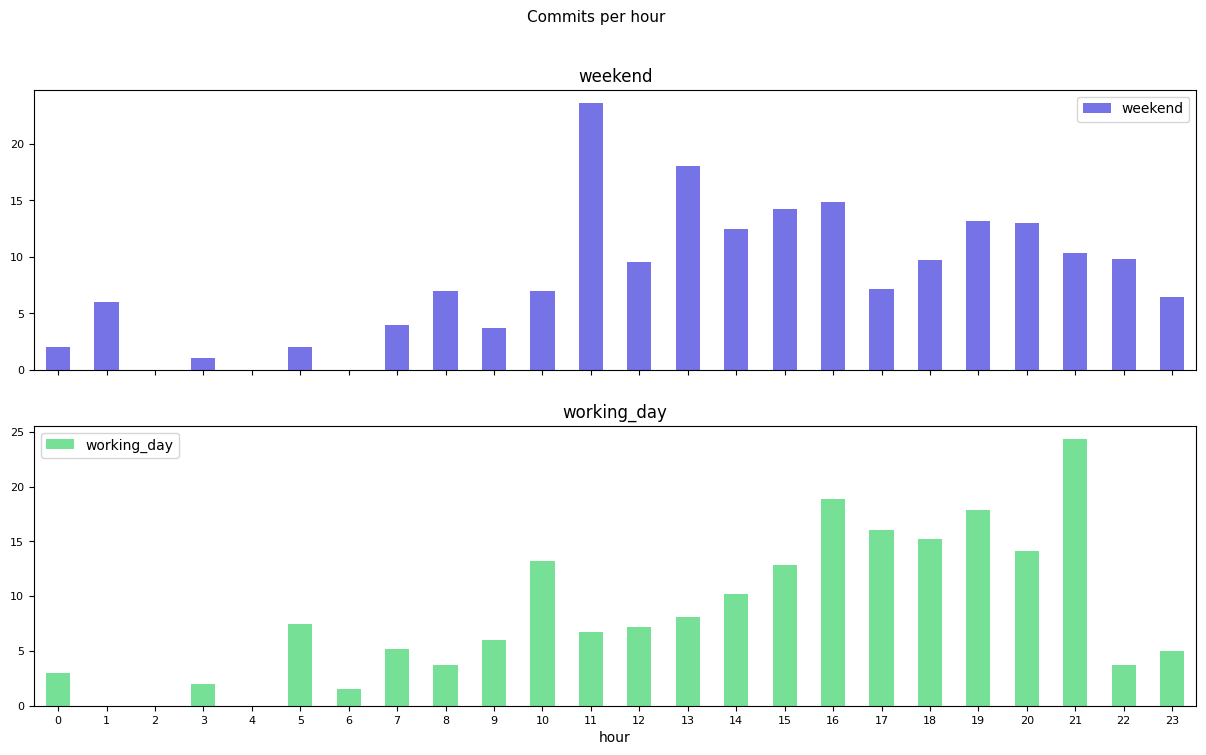

In [23]:
df_plot = pd.DataFrame({
    'hour': range(24),
    'working_day': weekday.sort_values('hour')['avg_commits'].values,
    'weekend': weekend.sort_values('hour')['avg_commits'].values
})
df_plot.set_index('hour', inplace=True)

axes = df_plot[['weekend', 'working_day']].plot(
    kind='bar',
    subplots=True,
    layout=(2, 1),
    figsize=(15, 8),
    grid=False,
    fontsize=8,
    color=['#7673e7', '#76e196']
)

axes[1][0].tick_params(axis='x', rotation=360)
axes[0][0].legend(['weekend'], loc='upper right')
axes[0][0].figure.suptitle("Commits per hour", fontsize=11);

### Connection closed

In [24]:
conn.close()

### Answer the question

In [25]:
max_weekday_hour = df_plot['working_day'].idxmax()
max_weekend_hour = df_plot['weekend'].idxmax()
max_weekday_hour

np.int64(21)

In [26]:
max_weekend_hour

np.int64(11)

### Yes, the dynamic is different.
### Working day maximum commits hour: `21:00`
### Weekend maximum commits hour: `11:00`